In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler 

In [2]:
ds=pd.read_csv('world_happiness.csv')
ds

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [3]:
ds.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

It is evident that there is no missing values in the dataset.

In [4]:
ds1=ds.iloc[:,3:5]

In [5]:
cr1=ds1.corr()

In [6]:
cr1

,Happiness Score,Standard Error
Happiness Score,1.000000,-0.177254
Standard Error,-0.177254,1.000000


The correlation value is << 1 , as the value is negative it can be observed that there is a inverse relationship between Happiness scores and the standard error.
Hence standard error col if dropped will not effect the over all process. Moreover, the values of standard error are all << 1 , so it is safe to say that mean of the overall dataset holds good.

In [7]:
ds.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


In [8]:
ds_cr=ds.iloc[:,2:11]
ds_cr

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [9]:
ds_cr.corr()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

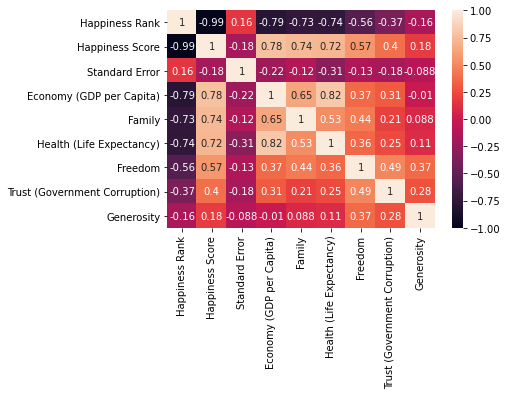

In [10]:
plt.figure()
sns.heatmap(ds_cr.corr(), annot =True, vmin=-1, vmax=1)
plt.show

Observations -
It can be seen that there is great positive correlation among the columns['Economy' , 'Family','Health(Life Expectancy)'] with Happiness Scores, i.e. , the the score or the index in turn is directly affected by the standards of the aforementioned columns of a country.
Standard error plays an iverse role with the Happiness score and hence can be left out of the calulations.
The dataset hence provided is a clean data set with proper numeric values.

Is is evident that there are no null values in the data so the data can be sepearted into x and y values so that proper scaling of the data can be done.

In [11]:
X=ds.iloc[:,5:11]
X

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...
153,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628
154,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260
155,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179
156,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727


In [12]:
y=ds.iloc[:,3:4]
y

,Happiness Score
0,7.587
1,7.561
2,7.527
3,7.522
4,7.427
...,...
153,3.465
154,3.340
155,3.006
156,2.905


In [13]:
scaler=MinMaxScaler()



In [14]:
X=scaler.fit_transform(X)
X 

array([[0.82613197, 0.96240274, 0.91824433, 0.99378854, 0.76059502,
        0.37289541],
       [0.77041209, 1.        , 0.92449646, 0.93884103, 0.25629179,
        0.54819822],
       [0.78411282, 0.97029731, 0.85309924, 0.96961462, 0.87617546,
        0.42894657],
       [0.86309911, 0.94916668, 0.86340892, 1.        , 0.66139407,
        0.43598281],
       [0.78459199, 0.94321902, 0.88332602, 0.94511221, 0.59714446,
        0.57560185],
       [0.76327185, 0.94011681, 0.86721287, 0.95813238, 0.74961497,
        0.2933985 ],
       [0.78645544, 0.91295294, 0.87085101, 0.91941529, 0.57643456,
        0.59820576],
       [0.7877983 , 0.91929997, 0.88843697, 0.98517313, 0.79440488,
        0.45562145],
       [0.73956768, 0.94112236, 0.88599854, 0.95468323, 0.77769926,
        0.59683621],
       [0.78890453, 0.93367707, 0.90861741, 0.97239186, 0.6457031 ,
        0.54734382],
       [0.72678388, 0.8728454 , 0.89136308, 0.61695011, 0.14105561,
        0.4167965 ],
       [0.56540978, 0

In [15]:
X= pd.DataFrame(X)
X

,0,1,2,3,4,5
0,0.826132,0.962403,0.918244,0.993789,0.760595,0.372895
1,0.770412,1.000000,0.924496,0.938841,0.256292,0.548198
2,0.784113,0.970297,0.853099,0.969615,0.876175,0.428947
3,0.863099,0.949167,0.863409,1.000000,0.661394,0.435983
4,0.784592,0.943219,0.883326,0.945112,0.597144,0.575602
...,...,...,...,...,...,...
153,0.131376,0.551764,0.418083,0.883953,1.000000,0.284314
154,0.169573,0.252355,0.311241,0.723426,0.145132,0.229432
155,0.392329,0.338668,0.704150,0.234184,0.342556,0.592790
156,0.009051,0.296578,0.218444,0.176937,0.182312,0.247864


## Training_testing the data

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y, train_size=.80, random_state=55)


In [17]:
lr_model=LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [18]:
print('Performance:',lr_model.score(X_test,y_test))

Performance: 0.790508565740012


it can be infered that the model holds good while giving a prediction of 79% accuracy.